Hannah Reagan

Importing proper materials to do analysis

In [50]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
%matplotlib inline

Importing the database 

In [51]:
conn = sqlite3.connect('../../data/im.db')
df = pd.read_sql("""SELECT * FROM movie_ratings;""", conn)


In [52]:
df = pd.read_sql("""SELECT * FROM directors;""", conn)

In [53]:
q = """
SELECT *
FROM movie_ratings
;
"""
#pd.read_sql(q, conn)

We are joining three tables ( persons, directors,movie ratings) Using movie_id to join directors and movie ratings and person_id to combine that new table to the persons table. We also filtered using the numvotes column, only keeping movies that have more than 1000 votes.

In [54]:
q = """
SELECT *
FROM movie_ratings
JOIN directors
    USING(movie_id)
JOIN Persons
    ON persons.person_id = directors.person_id
WHERE numvotes > 1000 -- normalizing the data making sure that they have at least 1000 votes
;
"""
pd.read_sql(q, conn)
df_directors = pd.read_sql(q, conn)
df_directors

,movie_id,averagerating,numvotes,person_id,person_id,primary_name,birth_year,death_year,primary_profession
0,tt1043726,4.2,50352,nm0001317,nm0001317,Renny Harlin,1959.0,NaN,"producer,director,writer"
1,tt1043726,4.2,50352,nm0001317,nm0001317,Renny Harlin,1959.0,NaN,"producer,director,writer"
2,tt1043726,4.2,50352,nm0001317,nm0001317,Renny Harlin,1959.0,NaN,"producer,director,writer"
3,tt1043726,4.2,50352,nm0001317,nm0001317,Renny Harlin,1959.0,NaN,"producer,director,writer"
4,tt1094666,7.0,1613,nm1464150,nm1464150,Oren Kaplan,1979.0,NaN,"director,editorial_department,camera_department"
...,...,...,...,...,...,...,...,...,...
26622,tt8948790,9.0,1778,nm9450602,nm9450602,Gowtam Tinnanuri,NaN,NaN,None
26623,tt9558612,3.7,4057,nm1293225,nm1293225,Omung Kumar,NaN,NaN,"art_department,art_director,production_designer"
26624,tt9558612,3.7,4057,nm1293225,nm1293225,Omung Kumar,NaN,NaN,"art_department,art_director,production_designer"
26625,tt9558612,3.7,4057,nm1293225,nm1293225,Omung Kumar,NaN,NaN,"art_department,art_director,production_designer"


Here we have removed duplicate movies using the drop duplicate function in Pandas. This resulted in dropped rows.

In [55]:
df_duplicates = df_directors.drop_duplicates()
df_duplicates

,movie_id,averagerating,numvotes,person_id,person_id,primary_name,birth_year,death_year,primary_profession
0,tt1043726,4.2,50352,nm0001317,nm0001317,Renny Harlin,1959.0,NaN,"producer,director,writer"
4,tt1094666,7.0,1613,nm1464150,nm1464150,Oren Kaplan,1979.0,NaN,"director,editorial_department,camera_department"
6,tt1171222,5.1,8296,nm0847859,nm0847859,David E. Talbert,1966.0,NaN,"writer,director,producer"
7,tt1174693,5.8,2381,nm0153774,nm0153774,Jacob Chase,1986.0,NaN,"editor,director,actor"
8,tt1181840,7.0,5494,nm0540962,nm0540962,Mathias Malzieu,1974.0,NaN,"actor,writer,director"
...,...,...,...,...,...,...,...,...,...
26617,tt8564902,4.7,5863,nm1625338,nm1625338,Dinesh D'Souza,1961.0,NaN,"writer,director,producer"
26619,tt8564902,4.7,5863,nm6583447,nm6583447,Bruce Schooley,NaN,NaN,"writer,director,producer"
26621,tt8574252,7.1,1526,nm4219902,nm4219902,Hoon-jung Park,NaN,NaN,"writer,director"
26622,tt8948790,9.0,1778,nm9450602,nm9450602,Gowtam Tinnanuri,NaN,NaN,None


Here we dropped values that were not listed as NaN in the death_year column. This was because directors that had a value listed in this column were seen as dead and ones without a value were still alive. 

In [57]:
df_duplicates = df_duplicates[df_duplicates['death_year'].isnull()]
df_duplicates

,movie_id,averagerating,numvotes,person_id,person_id,primary_name,birth_year,death_year,primary_profession
0,tt1043726,4.2,50352,nm0001317,nm0001317,Renny Harlin,1959.0,NaN,"producer,director,writer"
4,tt1094666,7.0,1613,nm1464150,nm1464150,Oren Kaplan,1979.0,NaN,"director,editorial_department,camera_department"
6,tt1171222,5.1,8296,nm0847859,nm0847859,David E. Talbert,1966.0,NaN,"writer,director,producer"
7,tt1174693,5.8,2381,nm0153774,nm0153774,Jacob Chase,1986.0,NaN,"editor,director,actor"
8,tt1181840,7.0,5494,nm0540962,nm0540962,Mathias Malzieu,1974.0,NaN,"actor,writer,director"
...,...,...,...,...,...,...,...,...,...
26617,tt8564902,4.7,5863,nm1625338,nm1625338,Dinesh D'Souza,1961.0,NaN,"writer,director,producer"
26619,tt8564902,4.7,5863,nm6583447,nm6583447,Bruce Schooley,NaN,NaN,"writer,director,producer"
26621,tt8574252,7.1,1526,nm4219902,nm4219902,Hoon-jung Park,NaN,NaN,"writer,director"
26622,tt8948790,9.0,1778,nm9450602,nm9450602,Gowtam Tinnanuri,NaN,NaN,None


Here we are dropping irrelevant columns that distracted from the finial story we were telling. These columns included ['death_year','birth_year', 'person_id']. 

In [59]:
df_duplicates.drop(columns=['death_year','birth_year', 'person_id', 'primary_profession'],inplace=True)

C:\Users\HSTEUERNAGLE\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Here we are printing out our final data table after all the proper cleaning had been done. 

In [60]:
df_duplicates

,movie_id,averagerating,numvotes,primary_name
0,tt1043726,4.2,50352,Renny Harlin
4,tt1094666,7.0,1613,Oren Kaplan
6,tt1171222,5.1,8296,David E. Talbert
7,tt1174693,5.8,2381,Jacob Chase
8,tt1181840,7.0,5494,Mathias Malzieu
...,...,...,...,...
26617,tt8564902,4.7,5863,Dinesh D'Souza
26619,tt8564902,4.7,5863,Bruce Schooley
26621,tt8574252,7.1,1526,Hoon-jung Park
26622,tt8948790,9.0,1778,Gowtam Tinnanuri


Here we are removing rows of data that are missing information also known as the null values. 

In [70]:
df_duplicates = df_duplicates.dropna()
df_duplicates.isna().sum()

movie_id         0
averagerating    0
numvotes         0
primary_name     0
dtype: int64

Here we listed out the top 10 directors with the most movies produced that also had over 1000 votes towards their movie ratings.

In [71]:
df_duplicates.value_counts("primary_name").head(10)

primary_name
Alex Gibney             15
Tyler Perry             13
Sarik Andreasyan        11
Uwe Boll                11
Takashi Miike           10
Steven C. Miller         9
Anurag Kashyap           9
Michael Winterbottom     8
Adam Wingard             8
Sang-soo Hong            8
dtype: int64

Here we are calculating the average rating for the top 10 directors based on the number of movies they directed after the data has been normalized using the filter of 1000 votes towards a movie rating.

In [72]:
# Step 1
grouped_data = df_duplicates.groupby('primary_name').agg({'averagerating': 'mean', 'movie_id': 'size'})

 

# Step 2
grouped_data.rename(columns={'averagerating': 'mean_averagerating', 'movie_id': 'movie_count'}, inplace=True)

 

# Step 3
top_10_names = grouped_data.sort_values(by='movie_count', ascending=False).head(10)

 

# Step 4
mean_averagerating_top_10 = top_10_names['mean_averagerating'].mean()

 

# Print the top 10 names, their mean averagerating, and the mean of averagerating for the top 10 names
#print(top_10_names)
print("\nMean Averagerating for Top 10 Names:", mean_averagerating_top_10)

df3= top_10_names.sort_values('mean_averagerating',ascending=False)
print(df3.head(10))


Mean Averagerating for Top 10 Names: 5.709602175602176
                      mean_averagerating  movie_count
primary_name                                         
Alex Gibney                     7.306667           15
Anurag Kashyap                  7.144444            9
Sang-soo Hong                   6.787500            8
Takashi Miike                   6.400000           10
Michael Winterbottom            6.237500            8
Sarik Andreasyan                5.236364           11
Tyler Perry                     4.930769           13
Steven C. Miller                4.677778            9
Keoni Waxman                    4.375000            8
Uwe Boll                        4.000000           11


Here we have our final cleaned data that we have used to create our visualizations.

In [73]:
df3

,mean_averagerating,movie_count
primary_name,,
Alex Gibney,7.306667,15
Anurag Kashyap,7.144444,9
Sang-soo Hong,6.787500,8
Takashi Miike,6.400000,10
Michael Winterbottom,6.237500,8
Sarik Andreasyan,5.236364,11
Tyler Perry,4.930769,13
Steven C. Miller,4.677778,9
Keoni Waxman,4.375000,8


Checked to make sure there was no correlation between the rating and the number of votes associated with that rating 

In [75]:
df_duplicates['averagerating'].corr(df_duplicates['numvotes'])

0.19200917502321962

Here we have created a visualization to represent the top 10 directors based the mean rating each director recieved for all the movies they created.

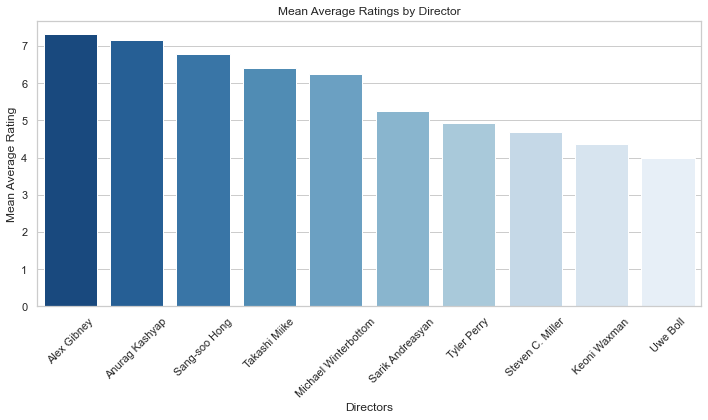

In [76]:

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

 

# Set up Seaborn

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

 

# Plot the bar graph

sns.barplot(x=df3.index, y='mean_averagerating', data=df3, palette="Blues_r")

plt.xticks(rotation=45)

plt.xlabel("Directors")

plt.ylabel("Mean Average Rating")

plt.title("Mean Average Ratings by Director")

plt.tight_layout()

 

# Show the plot

plt.show()
